#### I. Collecting images

This part contains the code used to collect the dataset of images used in the study.

In [2]:
import requests
from lxml import html

In [9]:
import os
import urllib.request
import html
import re
import csv

def download_page(pageUrl):  
    ### a function that downloads the html code of a page
    
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'  
    try:
        page = urllib.request.Request(pageUrl, headers={'User-Agent':user_agent})
        with urllib.request.urlopen(page) as response:
            html1 = response.read().decode('utf-8')
    except:
        print('Error at', pageUrl)
    return html1


In [4]:
from bs4 import BeautifulSoup

In [94]:
url = "https://www.google.com/search?newwindow=1&biw=1456&bih=735&tbm=isch&sa=1&ei=yufyXPefEf6Jk74PgtuWoA0&q=%D0%BF%D0%B0%D0%B4%D0%B0%D1%82%D1%8C+%D1%80%D0%B5%D0%B1%D0%B5%D0%BD%D0%BE%D0%BA&oq=%D0%BF%D0%B0%D0%B4%D0%B0%D1%82%D1%8C+%D1%80%D0%B5%D0%B1%D0%B5%D0%BD%D0%BE%D0%BA&gs_l=img.3...32061.32061..32182...0.0..0.62.62.1......0....2j1..gws-wiz-img.eSSr2eLWVts"

In [95]:
soup = BeautifulSoup(download_page(url), 'lxml')
images = soup.find_all(re.compile('img')) #finds all images in html code

In [96]:
i=2081 #image counter
folder = 'test1/test' # path to the folder where the images are saved


for img in images[1:]:
    with open(folder+str(i)+'.jpeg', 'wb') as f:
        f.write(requests.get(img['src']).content)
        i+=1

#### II. Image processing, obtaining vectors.

This part includes obtaining vectors by image processing


In [3]:
from scipy.misc import imresize
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from PIL import Image

In [5]:
import numpy as np

In [6]:
from scipy.spatial import distance

Get vectors from color images:

In [321]:
vectors = []
data  = []
folder = 'test1/'

for bigram in os.listdir(folder)[2:]:
    for image in os.listdir(folder+bigram):
        if (image != '.ipynb_checkpoints'):
            img = Image.open(folder'+bigram+'/'+image)
            img_resized = imresize(img, (100, 100))
            if (len(np.ravel(np.asarray(img_resized, dtype='uint8'))) == 30000):
                vectors.append(np.ravel(np.asarray(img_resized, dtype='uint8')))
                data.append([bigram, image, np.ravel(np.asarray(img_resized, dtype='uint8'))])


/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Get vectors from black and white images:

In [ ]:
vectors_bw = []
data_bw  = []
folder = 'test1/'

for bigram in os.listdir(folder)[2:]:
    for image in os.listdir(folder+bigram):
        if (image != '.ipynb_checkpoints'):
            img = Image.open(folder'+bigram+'/'+image)
            img_resized = imresize(img, (100, 100))
            arr = np.asarray(img_resized, dtype='uint8')
            x, y, _ = arr.shape
            k = np.array([[[0.2989, 0.587, 0.114]]])
            arr2 = np.round(np.sum(arr*k, axis=2)).astype(np.uint8).reshape((x, y))
            if (len(np.ravel(arr2)) == 10000):
                vectors_bw.append(np.ravel(arr2))
                data_bw.append([bigram, image, np.ravel(arr2)])

Get vectors closest to average vector:

In [387]:
data_mean = []

for bigram in os.listdir('new/')[1:]:
    vect = []
    arr = 0
    for image in os.listdir('new/'+bigram):
        if (image != '.ipynb_checkpoints'):
            img = Image.open('new/'+bigram+'/'+image)
            img_resized = imresize(img, (100, 100))
            if (len(np.ravel(np.asarray(img_resized, dtype='uint8'))) == 30000):
                arr+=np.ravel(np.asarray(img_resized, dtype='uint8'))
                vect.append([bigram, image, np.ravel(np.asarray(img_resized, dtype='uint8'))])
                
    mean = arr/len(vect) #average vector
    d = float ( "inf" )
    for v in vect:
        if abs(distance.cosine(v[2], mean)) < d:
            d = abs(distance.cosine(v[2], mean))
            res = v
    data_mean.append(res)
    

/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Saving data to the table:

In [11]:
import pandas as pd

In [431]:
data = pd.DataFrame(data, columns=['word', 'path', 'vector'])

In [432]:
data.head()

,word,path,vector
0,активность,test1661.jpeg,"[18, 18, 18, 12, 12, 12, 23, 23, 23, 17, 17, 1..."
1,активность,test1663.jpeg,"[20, 20, 20, 18, 18, 18, 21, 21, 21, 25, 25, 2..."
2,активность,test1664.jpeg,"[243, 238, 235, 243, 238, 235, 243, 238, 235, ..."
3,активность,test1665.jpeg,"[6, 7, 0, 10, 5, 0, 17, 3, 0, 26, 0, 0, 35, 0,..."
4,активность,test1666.jpeg,"[94, 91, 19, 92, 92, 17, 90, 93, 14, 90, 95, 1..."


#### III. Clusterisation

In [268]:
from sklearn.cluster import AffinityPropagation

In [208]:
clustering = AffinityPropagation().fit(np.array(vectors1))

In [209]:
centers = clustering.cluster_centers_

num = len(centers)  + 1

#for i in range(1, num):
#    plt.subplot(11, 2, i)
 #   img = np.reshape(centers[i-1, :], (100, 300))
 #   plt.imshow(img, cmap='Greys')
 #   plt.axis("off")
 #   plt.grid(None)

In [210]:
len(centers)

13

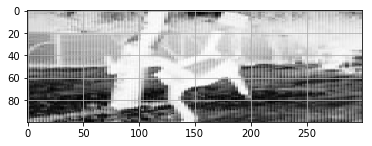

In [331]:
center = np.reshape(centers[5], (100, 300))
plt.imshow(center, cmap='Greys')
plt.grid(None)

In [221]:
data['class'] = clustering.labels_

In [305]:
data.head()

,path,vector,class
0,img0hu.jpeg,"[134, 117, 114, 128, 139, 136, 130, 157, 140, ...",2
1,img100ru.jpeg,"[235, 237, 240, 233, 226, 225, 226, 231, 229, ...",24
2,img100sl.jpeg,"[6, 8, 8, 7, 26, 17, 5, 13, 10, 2, 8, 9, 14, 1...",20
3,img101ru.jpeg,"[244, 232, 245, 252, 216, 200, 234, 243, 248, ...",19
4,img101sl.jpeg,"[3, 2, 2, 2, 2, 1, 2, 5, 6, 3, 3, 5, 5, 12, 12...",3


The distribution of images in the clusters folder:

In [92]:
import shutil

In [372]:
source = 'test1/'
dest = 'with_text/'

for i in range(47, 48):
    os.makedirs(dest+str(i))
    for path in data[data['text_class'] == i-1]['new_path']:
        shutil.move(source+path, dest+str(i))

Testing other clustering:

In [551]:
from sklearn.cluster import MeanShift
clustering = MeanShift().fit(np.array(vectors))

In [553]:
len(clustering.cluster_centers_)

4

#### IV. Combinig text and image vectors

In [32]:
f = open('falling_text vectors/falling_wa_ppmi_300_MAC.dm', 'r')

In [33]:
a = f.readlines()

In [34]:
vectors_text = [] #getting vectors for the bigrams with the verb падать 'to fall'
for line in a:
    if line.startswith('падать'):
        w = line.split('\t')
        vectors_text.append([w[0], w[1:]])

Reducing the size of image vectors using SVD method:

In [ ]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA


ex = Image.open('test1/снег/test101.jpeg')
ex_resized = imresize(ex, (100, 100))

arr = np.asarray(ex_resized, dtype='uint8')

ex = np.ravel(arr).reshape(10, 3000)

svd_cv = TruncatedSVD(300)
svd_cv.fit(ex)

In [ ]:
new_vectors = [] #collecting reduced vectors
for vector in data1.vector:
    new_vector = svd_cv.transform(vector.reshape(10, 3000))
    new_vectors.append(np.ravel(new_vector))

len(new_vectors)

data1['new_vector'] = new_vectors

data.head()

In [417]:
final_vectors = []
final_data = []
text_vectors = []
c = []
i = 0
j = 0
for vector in vectors_text:
    word = vector[0][7:]
    c.append(word)
    for img in data1[data1['word'] == word]['new_vector']:
        j+=1
        text_vector = np.array(vector[1]) 
        text_vectors.append(text_vector)
        final_vectors.append(np.concatenate((img, text_vector), axis = 0))
        final_data.append([word, np.concatenate((img, text_vector), axis = 0)])
        

In [27]:
from sklearn.cluster import AffinityPropagation

In [419]:
clustering = AffinityPropagation().fit(np.array(text_vectors))

In [420]:
final_data = pd.DataFrame(final_data, columns=['word', 'vector'])

In [328]:
final_data.head()

,word,vector
0,снег,"[6118.740033278978, 923.0122381254898, -222.09..."
1,снег,"[7330.404522325625, 330.46229210685203, -347.5..."
2,снег,"[8350.410063265426, -75.86497572496629, -65.57..."
3,снег,"[6674.426277221166, 1854.7782149335608, -337.9..."
4,снег,"[9301.35615949657, -1423.719443575328, 355.479..."


In [421]:
centers = clustering.cluster_centers_

In [422]:
len(centers)

13

In [423]:
final_data['text_class'] = clustering.labels_